In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from keras import metrics
from keras import backend as K
import matplotlib.pyplot as plt

Load and normalize data

In [2]:
transformed_data = np.fromfile("inputs_transformed.npy").reshape((-1, 12, 8, 8))
labels = np.fromfile("labels.npy")

In [3]:
labels.min(), labels.max()

(-10000.0, 10000.0)

Scale labels to range <-1, 1> so we can use tanh loss

In [4]:
transformed_labels = ((labels - labels.min()) / (labels.max() - labels.min())) * 2 - 1

In [5]:
transformed_labels.min(), transformed_labels.max()

(-1.0, 1.0)

split the data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(transformed_data, transformed_labels, test_size=0.2, random_state=42)

Define basic shallow model which we will use as a baseline

In [8]:
base_model = keras.Sequential(
    [
        keras.Input(shape=(12, 8, 8)),
        layers.Flatten(),
        layers.Dense(1, activation="tanh")
    ]
)
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 1)                 769       
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [11]:
base_model.compile(
    loss="mse",
    optimizer="adam",
    metrics=["mse", "mae"],
)

Train the model

In [16]:
base_model_history = base_model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
3201/3201 [==============================] - 15s 5ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0402 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.0399
Epoch 2/10
3201/3201 [==============================] - 13s 4ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0412 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.0401
Epoch 3/10
3201/3201 [==============================] - 13s 4ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0413 - val_loss: 0.0206 - val_mse: 0.0206 - val_mae: 0.0421
Epoch 4/10
3201/3201 [==============================] - 13s 4ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0414 - val_loss: 0.0205 - val_mse: 0.0205 - val_mae: 0.0415
Epoch 5/10
3201/3201 [==============================] - 13s 4ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0414 - val_loss: 0.0205 - val_mse: 0.0205 - val_mae: 0.0406
Epoch 6/10
3201/3201 [==============================] - 13s 4ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0413 - val_loss: 0.0205 - val_mse: 0.0205 - val_mae: 0.041

In [15]:
K.clear_session()

In [18]:
model_narrowing = keras.Sequential(
    [
        keras.Input(shape=(12, 8, 8)),
        layers.Flatten(),
        layers.Dense(12*8, activation="relu"),
        layers.Dense(12, activation="relu"),
        layers.Dense(1, activation="tanh")
    ]
)
model_narrowing.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 768)               0         
                                                                 
 dense_3 (Dense)             (None, 96)                73824     
                                                                 
 dense_4 (Dense)             (None, 12)                1164      
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 75,001
Trainable params: 75,001
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_narrowing.compile(
    loss="mse",
    optimizer="adam",
    metrics=["mse", "mae"],
)

In [20]:
model_narrowing.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
3201/3201 [==============================] - 17s 5ms/step - loss: 0.0209 - mse: 0.0209 - mae: 0.0443 - val_loss: 0.0203 - val_mse: 0.0203 - val_mae: 0.0413
Epoch 2/10
3201/3201 [==============================] - 16s 5ms/step - loss: 0.0199 - mse: 0.0199 - mae: 0.0411 - val_loss: 0.0198 - val_mse: 0.0198 - val_mae: 0.0400
Epoch 3/10
3201/3201 [==============================] - 16s 5ms/step - loss: 0.0189 - mse: 0.0189 - mae: 0.0402 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.0402
Epoch 4/10
3201/3201 [==============================] - 16s 5ms/step - loss: 0.0176 - mse: 0.0176 - mae: 0.0394 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.0402
Epoch 5/10
3201/3201 [==============================] - 16s 5ms/step - loss: 0.0165 - mse: 0.0165 - mae: 0.0384 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.0402
Epoch 6/10
3201/3201 [==============================] - 16s 5ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.0373 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.040

In [7]:
K.clear_session()
model_extended = keras.Sequential(
    [
        keras.Input(shape=(12, 8, 8)),
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(12*8*8, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(12*8, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(12, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(1, activation="tanh")
    ]
)
model_extended.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (BatchN  (None, 768)              3072      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 768)               590592    
                                                                 
 batch_normalization_1 (Batc  (None, 768)              3072      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 96)                73824     
                                                                 
 batch_normalization_2 (Batc  (None, 96)               3

In [8]:
model_extended.compile(
    loss="mse",
    optimizer="adam",
    metrics=["mse", "mae"],
)

In [9]:
model_extended.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
6402/6402 [==============================] - 79s 12ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.0551 - val_loss: 0.0211 - val_mse: 0.0211 - val_mae: 0.0469
Epoch 2/20
6402/6402 [==============================] - 73s 11ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0446 - val_loss: 0.0221 - val_mse: 0.0221 - val_mae: 0.0500
Epoch 3/20
6402/6402 [==============================] - 76s 12ms/step - loss: 0.0201 - mse: 0.0201 - mae: 0.0443 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.0530
Epoch 4/20
6402/6402 [==============================] - 75s 12ms/step - loss: 0.0187 - mse: 0.0187 - mae: 0.0460 - val_loss: 0.0339 - val_mse: 0.0339 - val_mae: 0.0743
Epoch 5/20
6402/6402 [==============================] - 76s 12ms/step - loss: 0.0167 - mse: 0.0167 - mae: 0.0464 - val_loss: 0.0433 - val_mse: 0.0433 - val_mae: 0.0849
Epoch 6/20
6402/6402 [==============================] - 76s 12ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0448 - val_loss: 0.0492 - val_mse: 0.0492 - val_mae:

In [10]:
K.clear_session()
model_extended_no_batch = keras.Sequential(
    [
        keras.Input(shape=(12, 8, 8)),
        layers.Flatten(),
        layers.Dense(12*8*8, activation="relu"),
        layers.Dense(12*8, activation="relu"),
        layers.Dense(12, activation="relu"),
        layers.Dense(1, activation="tanh")
    ]
)
model_extended_no_batch.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 768)               590592    
                                                                 
 dense_1 (Dense)             (None, 96)                73824     
                                                                 
 dense_2 (Dense)             (None, 12)                1164      
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 665,593
Trainable params: 665,593
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_extended_no_batch.compile(
    loss="mse",
    optimizer="adam",
    metrics=["mse", "mae"],
)

In [12]:
history_extended_no_batch = model_extended_no_batch.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
6402/6402 [==============================] - 35s 5ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0423 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.0397
Epoch 2/20
6402/6402 [==============================] - 31s 5ms/step - loss: 0.0194 - mse: 0.0194 - mae: 0.0409 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.0411
Epoch 3/20
6402/6402 [==============================] - 31s 5ms/step - loss: 0.0165 - mse: 0.0165 - mae: 0.0411 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.0433
Epoch 4/20
6402/6402 [==============================] - 31s 5ms/step - loss: 0.0132 - mse: 0.0132 - mae: 0.0376 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.0411
Epoch 5/20
6402/6402 [==============================] - 30s 5ms/step - loss: 0.0106 - mse: 0.0106 - mae: 0.0331 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.0417
Epoch 6/20
6402/6402 [==============================] - 31s 5ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0296 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.039

Better results so I will try to increase size

In [7]:
K.clear_session()
model_double_extended = keras.Sequential(
    [
        keras.Input(shape=(12, 8, 8)),
        layers.Flatten(),
        layers.Dense(12*8*8, activation="relu"),
        layers.Dense(12*8*4, activation="relu"),
        layers.Dense(12*8, activation="relu"),
        layers.Dense(12, activation="relu"),
        layers.Dense(1, activation="tanh")
    ]
)
model_double_extended.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 768)               590592    
                                                                 
 dense_1 (Dense)             (None, 384)               295296    
                                                                 
 dense_2 (Dense)             (None, 96)                36960     
                                                                 
 dense_3 (Dense)             (None, 12)                1164      
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 924,025
Trainable params: 924,025
Non-trai

In [8]:
model_double_extended.compile(
    loss="mse",
    optimizer="adam",
    metrics=["mse", "mae"],
)

In [9]:
history_double_extended = model_double_extended.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
6402/6402 [==============================] - 38s 6ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0491 - val_loss: 0.0216 - val_mse: 0.0216 - val_mae: 0.0486
Epoch 2/20
6402/6402 [==============================] - 34s 5ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0491 - val_loss: 0.0216 - val_mse: 0.0216 - val_mae: 0.0486
Epoch 3/20
6402/6402 [==============================] - 35s 5ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0491 - val_loss: 0.0216 - val_mse: 0.0216 - val_mae: 0.0486
Epoch 4/20
6402/6402 [==============================] - 34s 5ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0491 - val_loss: 0.0216 - val_mse: 0.0216 - val_mae: 0.0486
Epoch 5/20
6402/6402 [==============================] - 35s 5ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0491 - val_loss: 0.0216 - val_mse: 0.0216 - val_mae: 0.0488
Epoch 6/20
6402/6402 [==============================] - 35s 5ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0491 - val_loss: 0.0216 - val_mse: 0.0216 - val_mae: 0.048

KeyboardInterrupt: 

Podczas wszystkich powyższych eksperymentów MAE wynosiło ~0.03 onacza to że sieć średnio w ewaluacji myliła się o 3 pionki (0.03 * 10_000 / 100) spróbujmy przeskalować trochę dane. Mianowicie zdecydowana większość ewaluacji jest w zakresie <-2000, 2000> więc wartości większe od 2000 ograniczymy do 2000 i analogicznie dla wartości mniejszych od -2000.

(array([1.16470e+04, 4.00000e+01, 4.90000e+01, 7.50000e+01, 6.60000e+01,
        8.60000e+01, 1.00000e+02, 1.18000e+02, 1.32000e+02, 1.83000e+02,
        1.79000e+02, 2.05000e+02, 2.58000e+02, 2.83000e+02, 3.58000e+02,
        3.39000e+02, 4.00000e+02, 4.31000e+02, 5.03000e+02, 5.48000e+02,
        7.14000e+02, 7.47000e+02, 9.40000e+02, 1.02700e+03, 1.26500e+03,
        1.34500e+03, 1.64300e+03, 1.75100e+03, 2.21800e+03, 2.56500e+03,
        3.13100e+03, 3.73900e+03, 4.99400e+03, 7.03900e+03, 9.98900e+03,
        1.22790e+04, 1.58540e+04, 1.72740e+04, 1.81800e+04, 1.78910e+04,
        1.71600e+04, 1.55770e+04, 1.57240e+04, 1.62560e+04, 1.80530e+04,
        2.08200e+04, 2.62730e+04, 3.31100e+04, 5.09220e+04, 8.80550e+04,
        1.05488e+05, 6.69740e+04, 5.08050e+04, 3.81240e+04, 3.01470e+04,
        2.52770e+04, 2.16490e+04, 1.85340e+04, 1.75690e+04, 1.72230e+04,
        1.73960e+04, 1.78530e+04, 1.87350e+04, 1.83910e+04, 1.82610e+04,
        1.67740e+04, 1.41070e+04, 1.09080e+04, 8.52

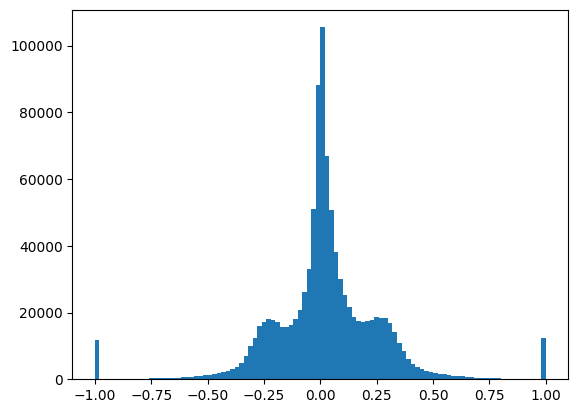

In [4]:
clipped_labels = np.clip(labels, -2000, 2000)
transformed_clipped_labels = ((clipped_labels - clipped_labels.min()) / (clipped_labels.max() - clipped_labels.min())) * 2 - 1
plt.hist(transformed_clipped_labels, bins=100)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(transformed_data, transformed_clipped_labels, test_size=0.2, random_state=42)

Weźmy najlepszą architekturę i przetrenujmy na nowych danych

In [7]:
K.clear_session()
model_extended_new_data = keras.Sequential(
    [
        keras.Input(shape=(12, 8, 8)),
        layers.Flatten(),
        layers.Dense(12*8*8, activation="relu"),
        layers.Dense(12*8, activation="relu"),
        layers.Dense(12, activation="relu"),
        layers.Dense(1, activation="tanh")
    ]
)
model_extended_new_data.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 768)               590592    
                                                                 
 dense_1 (Dense)             (None, 96)                73824     
                                                                 
 dense_2 (Dense)             (None, 12)                1164      
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 665,593
Trainable params: 665,593
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_extended_new_data.compile(
    loss="mse",
    optimizer="adam",
    metrics=["mse", "mae"],
)

In [9]:
history_extended_new_data = model_extended_new_data.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
6402/6402 [==============================] - 34s 5ms/step - loss: 0.0335 - mse: 0.0335 - mae: 0.0966 - val_loss: 0.0309 - val_mse: 0.0309 - val_mae: 0.0892
Epoch 2/20
6402/6402 [==============================] - 30s 5ms/step - loss: 0.0286 - mse: 0.0286 - mae: 0.0849 - val_loss: 0.0291 - val_mse: 0.0291 - val_mae: 0.0843
Epoch 3/20
6402/6402 [==============================] - 30s 5ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.0799 - val_loss: 0.0288 - val_mse: 0.0288 - val_mae: 0.0858
Epoch 4/20
6402/6402 [==============================] - 30s 5ms/step - loss: 0.0208 - mse: 0.0208 - mae: 0.0760 - val_loss: 0.0291 - val_mse: 0.0291 - val_mae: 0.0839
Epoch 5/20
6402/6402 [==============================] - 31s 5ms/step - loss: 0.0172 - mse: 0.0172 - mae: 0.0718 - val_loss: 0.0295 - val_mse: 0.0295 - val_mae: 0.0841
Epoch 6/20
6402/6402 [==============================] - 30s 5ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0676 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.083

In [33]:
def plot_training(history):
    epochs = history.epoch
    hist = history.history
    train_mse = hist["mse"]
    val_mse = hist["val_mse"]
    mae = hist["mae"]
    val_mae = hist["val_mae"]

    fig, ax = plt.subplots(2, 1)
    fig.tight_layout()
    ax[0].plot(train_mse,  '-r', label="training loss")
    ax[0].plot(val_mse, '-b', label="validation loss")
    ax[1].plot(mae, '-r', label="training loss")
    ax[1].plot(val_mae, '-b', label="validation loss")
    ax[0].set_title("MSE loss")
    ax[1].set_title("MAE loss (0.05 ~ 1 pawn)")
    ax[0].legend()
    ax[1].legend()
    ax[0].set_xticks(epochs)
    ax[1].set_xticks(epochs)
    plt.show()

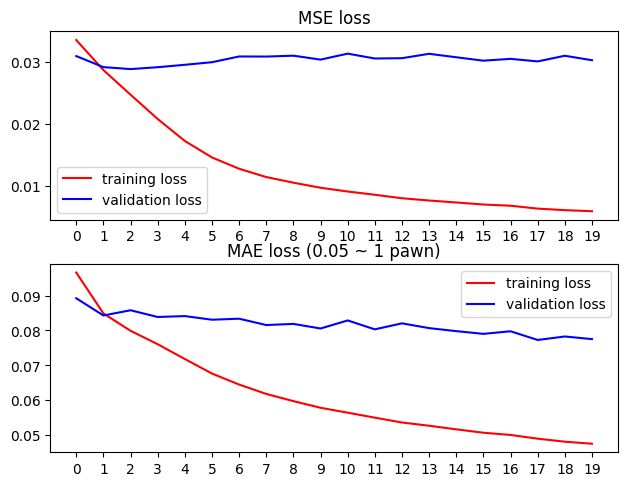

In [34]:
plot_training(history_extended_new_data)